In [12]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
from scipy.linalg import solve_triangular



In [90]:

#définition des constantes
nx=80
nt=100
l=80*1e-6
hx=1e-6
ht=1e-9
a0=1e-5
I0=1
epsilon0=8.85*1e-12
epsilonr=55
mu=6*1e-7
s=3*1e-2
e=1.602*1e-19
Nd=3.2*1e21
Na=9*1e20
beta=0
Eext=2500/(4*1e-3)



#initialisation des parametres A,B,C,D,a,b,c,d
E=np.zeros((nx,nt))
A=np.zeros((nx,nt))
B=np.zeros((nx,nt))
C=np.zeros((nx,nt))
D=np.zeros((nx,nt))
a=np.zeros((nx,nt))
b=np.zeros((nx,nt))
c=np.zeros((nx,nt))
d=np.zeros((nx,nt))
P=np.zeros((nx,nx))
Be=np.zeros(nx)
Ep=np.zeros((nx,nt)) #pour stocker les valeurs de E calculées
E[:,:]=Eext
norme=1



In [91]:
#definition des fonctions 
def I(x):
    return I0*exp(-(x/a0)**2)

def f(x,y):
    return 1-exp(-s*I(x)*y*ht)
def g(x,y):
     return y*ht*exp(-s*I(x)*y*ht)*(I(x)-I(x-1))/hx


In [92]:

while norme>1e-4: #critère d'arret
    Ep=E
    for j in range(nt):
        for i in range(nx):
            #calculs des parametres A,B,C...
            A[i,j]=-mu*epsilon0*epsilonr*E[i,j]
            B[i,j]=epsilon0*epsilonr
            C[i,j]=e*mu*(Nd-Na)*f(i,j)
            D[i,j]=e*mu*s*(Nd-Na)*g(i,j)
            a[i,j]=(A[i,j]/(hx**2)-B[i,j]/(hx*ht)-C[i,j]/hx)
            b[i,j]=(-2*A[i,j]/(hx**2)+B[i,j]/(hx*ht)+C[i,j]/(hx)+D[i,j])
            c[i,j]=A[i,j]/(hx**2)
            if j==0 and i==0:
                d[i,j]=B[i,j]/(hx*ht)*(-E[i,j]+E[i,j])
            elif j==0:
                d[i,j]=(B[i,j]/(hx*ht))*(-E[i,j]+E[i-1,j])
            elif i==0:
                d[i,j]=(B[i,j]/(hx*ht))*(-E[i,j-1]+E[i,j-1])
            else:
                d[i,j]=(B[i,j]/(hx*ht))*(-E[i,j-1]+E[i-1,j-1])
                
            if i==0:
                P[0,0]=b[0,j]
                P[0,1]=c[0,j]
                Be[0]=-a[0,j]*Eext-d[0,j]
            elif i==nx-1:
                P[i,i]=b[i,j]
                P[i,i-1]=a[i,j]
                Be[i]=-c[i,j]*Eext-d[i,j]
            else:
                P[i,i]=b[i,j]
                P[i,i+1]=c[i,j]
                P[i,i-1]=a[i,j]
                Be[i]=-d[i,j]
        E[:,j]=solve_triangular(P,Be)
        
    norme=np.linalg.norm(E-Ep)
                
                
            
            

    

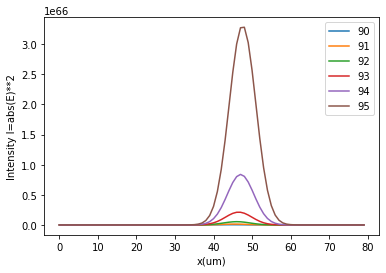

In [94]:
t=[90,91,92,93,94,95]
for j in t:
    plt.plot(abs(E[:,j])**2,label=(str(j)))
plt.xlabel('x(um)')
plt.ylabel("Intensity I=abs(E)**2")
plt.legend()




In [95]:
#définition des constantes 
epsilon0=8.85*1e-12
epsilonr=12.6
e=1.602*1e-19
mun=0.4
mup=0.015
en=37
cp=1.6*1e-14
cn=4.1*1e-14
nT0=5*1e21
pT0=6*1e22
phip=(1/1.275)*1e-3
n0=en*nT0/(cn*pT0)
I0=10000
w=2*1e-5
E0=1e6
n=3.17
reff=1.7*1e-12
epsilon=epsilon0*epsilonr
A=e*mun*n0/epsilon
Q=e*mup*phip*pT0/(epsilon*cp*nT0)


In [100]:
def I(x):
    return I0*np.exp(-x**2/w**2)
def E(x,t):
    d=A+Q*I(x)
    return E0*(A+Q*I(x)*np.exp(-d*t))/d
x=np.linspace(-5*1e-4,5*1e-4,100)
t=np.linspace(1,100,100)


Text(0.5, 0, 't')

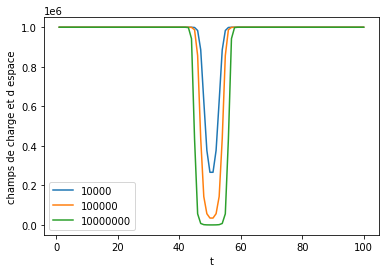

In [101]:
# effet de l'augmentation de I0
plt.plot(t,E(x,t),label=str(I0))
I0=10*I0
plt.plot(t,E(x,t),label=str(I0))
I0=100*I0
plt.plot(t,E(x,t),label=str(I0))
plt.legend()
plt.ylabel('champs de charge et d espace')
plt.xlabel('t')

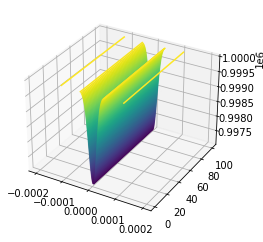

In [102]:
from mpl_toolkits import mplot3d
I0=10
def I(x):
    return I0*np.exp(-x**2/w**2)
def E(x,t):
    d=A+Q*I(x)
    return E0*(A+Q*I(x)*np.exp(-d*t))/d

l=400*1e-6
t=np.linspace(1,100,200)
x=np.linspace(-l/2,l/2,200)

X, T = np.meshgrid(x, t)
Z = E(X, T)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, T, Z,100)
